## IMPLEMENTANDO ALGORITIMO DE MACHINE LEARNING (REGRESSÃO LINEAR) EM BASE DE DADOS REDUZIDA: introdução ao M.L.


In [22]:
# importando as bibliotecas que iremos usar para análise e visalisação dos dados:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# atribuindo a base de dados a um variável:
base_dados = pd.read_excel('/content/drive/MyDrive/DADOS PARA REGRESSÃO LINEAR EM PYTHON/BaseDados_RegressaoLinear.xlsx') # passei plan1 para indicar qual aba, dentro do aetigo excel, eu quero.

# comando para obter algumas infmração sobre a planilha:
base_dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


# VAMOS AGORA FAZER ALGUMAS ANÁLISES PARA IDENTIFICAR SE HÁ VALORES FALTANTES OU INCONSISTENTES:


In [23]:
# comando para obter algumas estatisticas acerca da base de dados
base_dados.describe()

# como essa base da dados é extremamente simples, pois o objeivo é ser didáticos, apenas o simoples comando .discrebe() já serve para identificar se há valores errados ou inesistentes,
# que seria algo ruim para o aprendizao do nosso modelo, no caso, não há.


,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


# CONVERTENDO OS DADOS PARA O TIPO ARRAY.

In [34]:
# PARA CONVERTER OS DADOS QUE ESTÃO EM TABELA PARA O FORMATO DE ARRAY, VAMOS USAR A BIBLIOTECA NUMPY:

# vamos atribuir a variável 'eixo_x' todas as linhas da base de dados, e apenas a primeiras coluna, 
# para isso, aplicamos a função '.iloc' do pandas. .iloc[ : ,0] o primiero parâmetro são as linhas, no caso, quero todas entao usei os ':' e o segundo parâmetro é a coluna,
# no aso, quero que o eixo_x tenha apenas a coluna 'salario', portanto, peguei a coluna de posição 0, ficando então: .iloc[ : ,0]
# o '.values' faz parte da sintax.

# para o eixo_y segue o mesmo reciocinio só que no lugar pegamos a segunda coluna (Limite_Emprestimo)

eixo_x = base_dados.iloc[ : , 0].values
eixo_y = base_dados.iloc[ : , 1].values

# visualizando os valores , agora em formato de array:

print(eixo_x)
print('\n')    # apenas para mostrar uma linha vazoa para facilitar a vizualização.
print(eixo_y)


[1250.21913    1262.7213213  1275.34853451 1288.10201986 1300.98304006
 1313.99287046 1327.13279916 1340.40412715 1353.80816843 1367.34625011
 1381.01971261 1394.82990974 1408.77820883 1422.86599092 1437.09465083
 1451.46559734 1465.98025331 1480.64005585 1495.4464564  1510.40092097
 1525.50493018 1540.75997948 1556.16757927 1571.72925507 1587.44654762
 1603.32101309 1619.35422323 1635.54776546 1651.90324311 1668.42227554
 1685.1064983  1701.95756328 1718.97713891 1736.1669103  1753.52857941
 1771.0638652  1788.77450385 1806.66224889 1824.72887138 1842.97616009
 1861.4059217  1880.01998091 1898.82018072 1917.80838253 1936.98646635
 1956.35633102 1975.91989433 1995.67909327 2015.6358842  2035.79224305
 2056.15016548 2076.71166713 2097.4787838  2118.45357164 2139.63810736
 2161.03448843 2182.64483331 2204.47128165 2226.51599446 2248.78115441
 2271.26896595 2293.98165561 2316.92147217 2340.09068689 2363.49159376
 2387.1265097  2410.99777479 2435.10775254 2459.45883007 2484.05341837
 2508.

# VISUALIZANDO OS DADOS DE FORMA GRÁFICA.

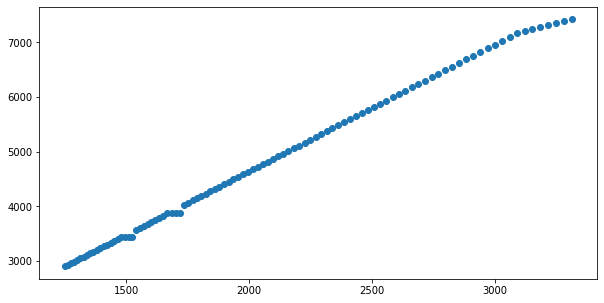

In [25]:
# .scatter é o um gráfico de disperção;
# passamos como eixo x os valores que estão na variável 'eixo_x' e como eixo y os valores que estão na variável 'eixo_y'

plt.figure(figsize = (10,5)) # aqui usamos o comando para detemrinar o tamanho do gráfico (10 em x e 5 em y), para não ficar muito pequeno.
plt.scatter(eixo_x, eixo_y); # aqui passamos os eixos para ser gerado o grpafico de disperssão (.scartter)


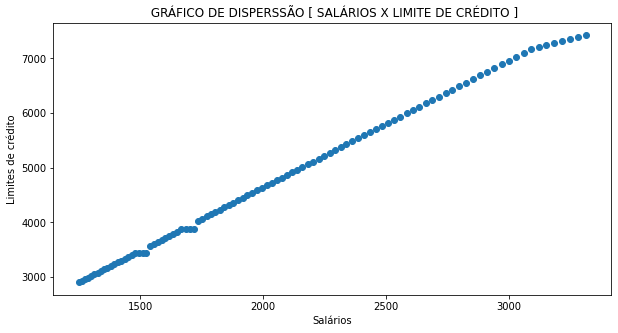

In [26]:
# vamos personalozar esse gráfico:
plt.figure(figsize = (10,5))
plt.scatter(eixo_x, eixo_y)

plt.title(' GRÁFICO DE DISPERSSÃO [ SALÁRIOS X LIMITE DE CRÉDITO ]')
plt.xlabel('Salários')
plt.ylabel('Limites de crédito');

# USANOD A BIBLIOTECA NUMPY PARA CALCULAR A CORRELAÇÃO EXISTENTE ENTRE AS COLUNAS: como é possível notar por meio do gráficos, há uma correlação de caráter linear, mas vamos agora quantificar essa correlação.

In [27]:
# declaramos uma variável chamada correlação para guardar o valor do array qe será gerado
# como resposta ao comando que pede o valore nemérico da correlação entre as colunas 'salario' e limite de credito'

# a função do numpy que faz esse calculo da correlação é a '.corrcoef( aqui passa os eixos que serão comparados separados por virgula)'
correlacao = np.corrcoef(eixo_x, eixo_y)

print(correlacao)

[[1.         0.99949773]
 [0.99949773 1.        ]]


# Para entender melhor os valores dados calculados pela função 'np.corrcoef( )' vamos enter, brevemente, oque é correlação de uma forma matemática-estatistica.

# Veja a imagem abaixo:



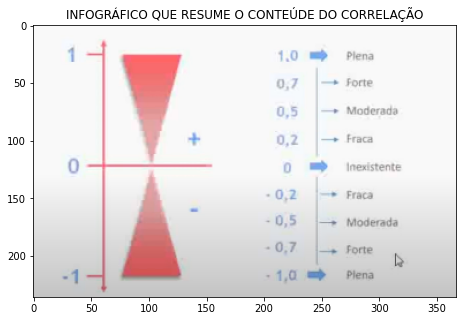

In [28]:
# importando a biblioteca nescessária para visualização da imagem
from skimage import io

# atribuindo a imagem a uma variável para visualizar posteriormente
img = io.imread('/content/drive/MyDrive/DADOS PARA REGRESSÃO LINEAR EM PYTHON/CORRELAÇÃO.png')

plt.figure(figsize=(10,5)) # apenas deixando a imagem em um tamanho maior
plt.imshow(img); # plotando a imagem 

# titulo da imagem
plt.title('INFOGRÁFICO QUE RESUME O CONTEÚDE DO CORRELAÇÃO');

* Quandoto mais próximo de 1 significa que os dados avalizados possuem uma correlação diretamente proporcional mais forte (plena)

* Quanto mais perto do zero menos correlçaão (inexistente)

* Quanto mais perto do -1 mais a correlação inversamente proporcional. 



# A CORRELAÇÃO ENCONTRADA ANALITICAMENTE, COMO JÁ ERA ESPERADO, FOI PROXÍMO DE PLENO.

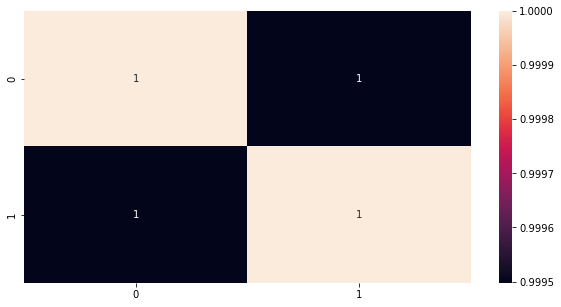

In [33]:
# VISUALISANDO AS CORRELAÇÕES POR MEIO DE UM GRÁFICO

plt.figure(figsize=(10,5));
sns.heatmap(correlacao, annot=True);

# OBS: o pyhton arredondou para 1 todas as informações, mas o obejtivo é trinar os comandos.

# AGORA VAMOS INICIAR O CONFECCIONAMENTO DO NOSSO MODELO DE MACHINE LEARNING.

In [35]:
# TRANSFORMANDO OS DADOS PARA O FORMATO DE MATRIZ

eixo_x = eixo_x.reshape(-1, 1)
eixo_y = eixo_y.reshape(-1, 1)


In [46]:
# IMPORTANDO A BIBLIOTECA PARA IMPLEMENTAÇÃO DO NOSSO MODELO

# essa bibliteca nos ajudará a dividir os nossos dados em dados de trino e test

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(
    eixo_x,
    eixo_y,
    test_size=0.20) # separamos 20% dos dados para teste


In [48]:
# vamos visualizar quanto ficou em cada "bloco" de treino e teste

print(len(x_treino), len(x_teste))

# perceba que temos 79 valores para treino e 20 para teste

79 20


# Nosso objetivo é criar um modelo de machine learning usando o algoritimo da regressão linear, vamos criá-lo.

In [53]:
# importando mais um módulo dentro da biblioteca sklearn

# importando a função regressão linear dentro da biblioteca sklearn
from sklearn.linear_model import LinearRegression

# Vamos agora atribuir essa função que importamos (LinearRegresion) à uma variável
regressao = LinearRegression()

# Vamos aplicar a função LinearRegression, por meio da variavel "regrassao" que declaramos,
# e aplicá-la em nossos dados. (ISSO É TREINAR O MODELO)

# aplicando a função '.fit()' para realizar os cruzamentos dos dados aplicando o algoritomo da regressão linear

regressao.fit(x_treino, y_treino) # aqui passamos os parâmetros "x_teste" que são os valores de salarios, e o parâmetro "y_teste",
                                  # que são os valores que limite de credito. 


LinearRegression()

# O MODELO FOI TREINADO!

In [54]:
# usando a função '.score' para obter o quando o modelo é "eficiente"

regressao.score(x_treino, y_treino)

# temos uma acertividade muito boa, perto de 1 (100%)

0.998973253714449

# Vamos plotar um gráfico para visualizar os valores que já temos com os valores que o modelo encontra com base nos treinos. 


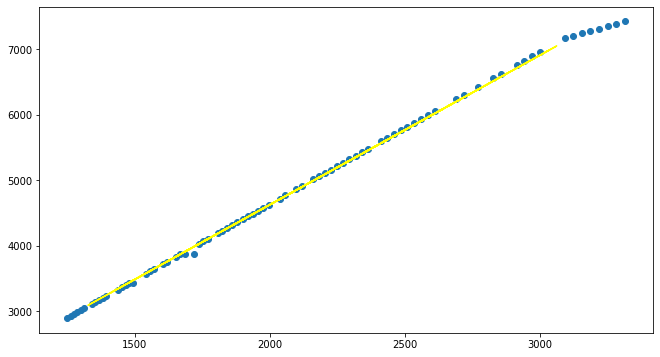

In [64]:
plt.figure(figsize=(11,6)); # ja sabemos que esse comando apenas cria uma janela com o tamanho que queremos.
plt.scatter(x_treino, y_treino); # aqui colocamos no gráfco os valores que ja tinhamos na forma de um gráfico de disperção.
plt.plot(x_teste, regressao.predict(x_teste), color = 'yellow'); # aqui ele compara o valor do x_teste com o valores que ele preveu.

# FICA NÍTIDO, GRAFICAMENTE, POR MEIO DA LINHA AMARELA, QUE NOSSO MODELO CONSEGUIU UMA LINHA QUE SE ADEQUOU MUITO BEM AO CASO.